In [3]:
# Importing necessary libraries
import json
import pandas as pd
import os 
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import numpy as np
import itertools
import pyvista as pv
from shapely.geometry import Polygon
from pyvista import examples

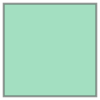

In [4]:
# Create a 2D polygon using Shapely
polygon_points = [(0, 0), (1, 0), (1, 1), (0, 1)]  # Define square polygon
polygon = Polygon(polygon_points)
polygon

In [5]:
# Get the x, y coordinates from the polygon
x, y = polygon.exterior.xy
x, y

(array('d', [0.0, 1.0, 1.0, 0.0, 0.0]), array('d', [0.0, 0.0, 1.0, 1.0, 0.0]))

In [6]:
# Convert the 2D polygon to a 3D mesh by extruding along the z-axis
z = np.zeros_like(x)  # Start at z=0 for the bottom face
top_z = np.ones_like(x) * 2  # Extrude to z=2 for the top face

z, top_z

(array([0., 0., 0., 0., 0.]), array([2., 2., 2., 2., 2.]))

In [40]:
xe = np.hstack([z, top_z])  # Convert them into a 1D array
xe

array([0., 0., 0., 0., 0., 2., 2., 2., 2., 2.])

In [43]:
print(np.array([x, y]))

[[0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0.]]


In [44]:
arr = np.array([[1, 2], [3, 4]])
arr

array([[1, 2],
       [3, 4]])

In [42]:
xw = np.tile(np.array([x, y]), (2, 1))
xw

array([[0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0.]])

In [37]:
# Create 3D points from the 2D polygon
points = np.column_stack([np.tile(np.array([x, y]), (2, 1)), np.hstack([z, top_z])])
points

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 4 and the array at index 1 has size 10

In [34]:
# Define the faces of the extrusion (bottom, top, and sides)
faces = np.array([4, 0, 1, 2, 3, 4, 4, 5, 6, 7])

In [35]:
# Create the mesh
mesh = pv.PolyData(points,faces)

In [36]:
# Plot the extrusion
plotter = pv.Plotter()
plotter.add_mesh(mesh, color='blue')
plotter.show()

Widget(value='<iframe src="http://localhost:50136/index.html?ui=P_0x1556367e0_7&reconnect=auto" class="pyvista…

In [45]:
# Create a polygon (let's take a simple square as an example)
polygon = pv.Polygon(center=(0, 0, 0), radius=1.0, n_sides=4)

# Extrude the polygon to create a 3D object (like a cube)
extruded_polygon = polygon.extrude([0, 0, 1])

# Create a plotter to visualize the extruded object
plotter = pv.Plotter()
plotter.add_mesh(extruded_polygon, color="lightblue")
plotter.show()

/opt/anaconda3/envs/test/lib/python3.12/site-packages/pyvista/core/filters/poly_data.py:2997: PyVistaFutureWarning: The default value of the ``capping`` keyword argument will change in a future version to ``True`` to match the behavior of VTK. We recommend passing the keyword explicitly to prevent future surprises.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50136/index.html?ui=P_0x15563b290_8&reconnect=auto" class="pyvista…